In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_sample = pd.read_csv ('sample_submission.csv', sep = ',')
df_train_exist = pd.read_csv ('train.csv', sep = ',')
df_test = pd.read_csv ('test.csv', sep = ',')

In [3]:
print(df_train_exist.columns)
df_train_exist.info()
df_train_exist

Index(['_id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-

,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0
5,3c41d96da147ab5a745938cbd85e2313,56,self-employed,single,basic.9y,unknown,no,no,telephone,jun,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
6,1a87845e9d5740a2619acd478da08459,33,admin.,married,university.degree,no,yes,yes,cellular,may,...,2,999,0,nonexistent,-1.8,93.876,-40.0,0.685,5008.7,0
7,e07d393a5d9b174b39f6064823386759,36,management,married,university.degree,no,yes,no,cellular,nov,...,1,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,0
8,e5a3da407a75e8475a3e1bb6a804b1c7,70,retired,married,professional.course,no,no,no,cellular,oct,...,1,6,3,success,-1.1,94.601,-49.5,0.987,4963.6,1
9,42b112272cd4851b4d65d1ed464fbbd9,32,blue-collar,married,professional.course,unknown,yes,no,cellular,may,...,2,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,0


In [4]:
for i in df_train_exist.columns: # перебираем все столбцы
    if str(df_train_exist[i].dtype) == 'object' and i != '_id': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train_exist[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

job
{'unknown', 'housemaid', 'blue-collar', 'admin.', 'services', 'retired', 'entrepreneur', 'management', 'technician', 'student', 'self-employed', 'unemployed'}


marital
{'divorced', 'married', 'unknown', 'single'}


education
{'unknown', 'basic.9y', 'university.degree', 'professional.course', 'basic.6y', 'illiterate', 'basic.4y', 'high.school'}


default
{'no', 'unknown', 'yes'}


housing
{'no', 'unknown', 'yes'}


loan
{'no', 'unknown', 'yes'}


contact
{'telephone', 'cellular'}


month
{'oct', 'mar', 'nov', 'apr', 'jul', 'sep', 'jun', 'dec', 'aug', 'may'}


day_of_week
{'wed', 'fri', 'mon', 'thu', 'tue'}


poutcome
{'nonexistent', 'success', 'failure'}




In [ ]:
import seaborn as sns

#TODO
#удаляем ID как непоказательный
sns.pairplot(df_train_exist, hue='target');

In [5]:
def preproc_data(df_input):
    df_output = df_input.copy()

    contacts = {'telephone': 0, 'cellular': 1}
    df_output.loc[:, 'contact_enc'] = df_output.contact.replace(contacts)

    months = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
    df_output.loc[:, 'month_enc'] = df_output.month.replace(months)
    
    days_of_week = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 0, 'sun': 0}
    df_output.loc[:, 'day_of_week_enc'] = df_output.day_of_week.replace(days_of_week)

    ##справочник для полей default, housing, loan - одинаковый набор значений
    vals = {'no': 0, 'unknown': 0, 'yes': 1}
    df_output.loc[:, 'default_enc'] = df_output.default.replace(vals)
    df_output.loc[:, 'housing_enc'] = df_output.housing.replace(vals)
    df_output.loc[:, 'loan_enc'] = df_output.loan.replace(vals)
    
    ##справочник для поля poutcome
    vals = {'failure': -1, 'nonexistent': 0, 'success': 1}
    df_output.loc[:, 'poutcome_enc'] = df_output.poutcome.replace(vals)
    
    #остальные через hash
    k = 25
    df_output['job_enc'] = df_output['job'].map(hash)%k
    df_output['marital_enc'] = df_output['marital'].map(hash)%k
    df_output['education_enc'] = df_output['education'].map(hash)%k
    
    df_output = df_output.drop(['_id', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome'
       #, 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
                               ], axis=1)
 

    return df_output

In [6]:
def preproc_data2(df_input):
    df_output = df_input.copy()

    contacts = {'telephone': 0, 'cellular': 1}
    df_output.loc[:, 'contact_enc'] = df_output.contact.replace(contacts)
    
    ##справочник для полей default, housing, loan - одинаковый набор значений
    vals = {'no': 0, 'unknown': 0, 'yes': 1}
    df_output.loc[:, 'default_enc'] = df_output.default.replace(vals)
    df_output.loc[:, 'housing_enc'] = df_output.housing.replace(vals)
    df_output.loc[:, 'loan_enc'] = df_output.loan.replace(vals)

    #остальные через hash
#    k = 3
    df_output['job_enc'] = df_output['job'].map(hash)#%k
    df_output['marital_enc'] = df_output['marital'].map(hash)#%k
    df_output['month_enc'] = df_output['month'].map(hash)#%k
    df_output['day_of_week_enc'] = df_output['day_of_week'].map(hash)#%k
    df_output['poutcome_enc'] = df_output['poutcome'].map(hash)#%k
    
    df_output = df_output.drop(['_id', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome'
       #, 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
                               ], axis=1)
 

    return df_output

In [7]:
def preproc_data3(df_input):
    df_output = df_input.copy()

    contacts = {'telephone': 0, 'cellular': 1}
    df_output.loc[:, 'contact_enc'] = df_output.contact.replace(contacts)
    
    ##справочник для полей default, housing, loan - одинаковый набор значений
    vals = {'no': 0, 'unknown': 0, 'yes': 1}
    df_output.loc[:, 'default_enc'] = df_output.default.replace(vals)
    df_output.loc[:, 'housing_enc'] = df_output.housing.replace(vals)
    df_output.loc[:, 'loan_enc'] = df_output.loan.replace(vals)

    #остальные через hash
    k = 25
    df_output['job_enc'] = df_output['job'].map(hash)%k
    df_output['marital_enc'] = df_output['marital'].map(hash)%k
    df_output['month_enc'] = df_output['month'].map(hash)%k
    df_output['day_of_week_enc'] = df_output['day_of_week'].map(hash)%k
    df_output['poutcome_enc'] = df_output['poutcome'].map(hash)%k
    
    df_output = df_output.drop(['_id', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome'
       #, 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
                               ], axis=1)
 

    return df_output

In [8]:
def preproc_data4(df_input):
    df_output = df_input.copy()

    df_output = df_output.drop(['_id', 'age', 'pdays', 'campaign', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'previous', 
       'emp.var.rate', 'cons.price.idx'
                               ], axis=1)
 

    return df_output


In [9]:
df_train = df_train_exist.pipe(preproc_data)
X_train = df_train.drop(['target'], axis=1).values
y_train = df_train.loc[:, 'target'].values

df_train2 = df_train_exist.pipe(preproc_data2)
X_train2 = df_train2.drop(['target'], axis=1).values
y_train2 = df_train2.loc[:, 'target'].values

df_train3 = df_train_exist.pipe(preproc_data3)
X_train3 = df_train3.drop(['target'], axis=1).values
y_train3 = df_train3.loc[:, 'target'].values

df_train4 = df_train_exist.pipe(preproc_data4)
X_train4 = df_train4.drop(['target'], axis=1).values
y_train4 = df_train4.loc[:, 'target'].values

df = df_test.pipe(preproc_data)
X_test = df.values

df2 = df_test.pipe(preproc_data2)
X_test2 = df2.values

df3 = df_test.pipe(preproc_data3)
X_test3 = df3.values

df4 = df_test.pipe(preproc_data4)
X_test4 = df4.values

In [559]:
print(X_train3)
print(y_train3)

[[ 54.  87.   1. ...   4.  20.  22.]
 [ 36. 291.   1. ...  12.  16.  22.]
 [ 53. 182.   1. ...   4.  16.  22.]
 ...
 [ 35. 194.   1. ...  14.   2.   6.]
 [ 40. 295.   2. ...  12.  17.  22.]
 [ 29. 333.   2. ...  16.  16.  22.]]
[0 0 0 ... 1 0 0]


In [ ]:
#ищем оптимальные параметры для метода ближайших соседей
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_jobs=-1, metric='minkowski'))])
knn_params = {'knn__n_neighbors': range(1, 30)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=10, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)
print(knn_grid.best_params_, knn_grid.best_score_)


knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_jobs=-1, metric='minkowski'))])
knn_params = {'knn__n_neighbors': range(1, 30)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=10, n_jobs=-1, verbose=True)

knn_grid.fit(X_train2, y_train2)
print(knn_grid.best_params_, knn_grid.best_score_)

In [11]:
#тренируем с наилучшими параметрами

#metric='minkowski': {'knn__n_neighbors': 9} 0.30706562345457766
#metric='manhattan': {'knn__n_neighbors': 9} 0.3059800982456717

knn = Pipeline([#('scaler', StandardScaler()), 
                ('knn', KNeighborsRegressor(n_jobs=-1, n_neighbors=21, weights='uniform', metric='minkowski'))])

knn.fit(X_train, y_train)

knn2 = Pipeline([('scaler', StandardScaler()), 
                ('knn2', KNeighborsRegressor(n_jobs=-1, n_neighbors=21, weights='uniform', metric='minkowski'))])

knn2.fit(X_train2, y_train2)

knn3 = Pipeline([('scaler', StandardScaler()), 
                ('knn3', KNeighborsRegressor(n_jobs=-1, n_neighbors=21, weights='uniform', metric='minkowski'))])

knn3.fit(X_train3, y_train3)

knn4 = Pipeline([('scaler', StandardScaler()), 
                ('knn4', KNeighborsRegressor(n_jobs=-1, n_neighbors=21, weights='uniform', metric='minkowski'))])

knn4.fit(X_train4, y_train4)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn4', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
          weights='uniform'))])

In [12]:
#ищем оптимальные параметры для дерева
tree_params = {'max_depth': range(1,11)}
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=123), tree_params, cv=10, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

print(tree_grid.best_params_)
print(tree_grid.best_score_)

tree_grid2 = GridSearchCV(DecisionTreeClassifier(random_state=123), tree_params, cv=10, n_jobs=-1, verbose=True)
tree_grid2.fit(X_train2, y_train2)

print(tree_grid2.best_params_)
print(tree_grid2.best_score_)

tree_grid3 = GridSearchCV(DecisionTreeClassifier(random_state=123), tree_params, cv=10, n_jobs=-1, verbose=True)
tree_grid3.fit(X_train3, y_train3)

print(tree_grid3.best_params_)
print(tree_grid3.best_score_)

tree_grid4 = GridSearchCV(DecisionTreeClassifier(random_state=123), tree_params, cv=10, n_jobs=-1, verbose=True)
tree_grid4.fit(X_train4, y_train4)

print(tree_grid4.best_params_)
print(tree_grid4.best_score_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'max_depth': 5}
0.9139689219812237
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.5s


{'max_depth': 5}
0.9144545160246035
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished


{'max_depth': 5}
0.9144140498543218
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


{'max_depth': 5}
0.9098818387827776


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [13]:
# тренируем дерево с наилучшими параметрами
tree = DecisionTreeClassifier(max_depth=5, random_state=123)
tree.fit(X_train, y_train)
y_hat_tree = tree.predict(X_train)

tree2 = DecisionTreeClassifier(max_depth=5, random_state=123)
tree2.fit(X_train2, y_train2)
y_hat_tree2 = tree2.predict(X_train2)

tree3 = DecisionTreeClassifier(max_depth=5, random_state=123)
tree3.fit(X_train3, y_train3)
y_hat_tree3 = tree3.predict(X_train3)

tree4 = DecisionTreeClassifier(max_depth=5, random_state=123)
tree4.fit(X_train4, y_train4)
y_hat_tree4 = tree4.predict(X_train4)


In [457]:
coefs = np.empty((X_train2.shape[1],))
scores = []

c_range = np.logspace(-3, 3, 10)

for C in c_range:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='l2', fit_intercept=True, C=C))
    ])

    model.fit(X_train2, y_train2)
    
    
    coefs = np.c_[coefs, model.named_steps['clf'].coef_[0]]
    print(C)
    print(model.named_steps['clf'].coef_[0])
    print(roc_auc_score(y_train2, model.predict_proba(X_train2)[:, 1]))
    s = roc_auc_score(y_train2, model.predict_proba(X_train2)[:, 1])
    scores.append(s)

0.001
[ 0.0173076   0.59699043 -0.02631457 -0.18647295 -0.03157678 -0.16174385
  0.0999851   0.12823251 -0.11781959 -0.23970042  0.14418649 -0.00069319
 -0.00364251  0.0010494  -0.03271119 -0.03007824 -0.13052289 -0.00171238
 -0.09682532]
0.9239850274057062
0.004641588833612777
[ 1.79210911e-02  8.89685187e-01 -6.09405690e-02 -2.60274154e-01
 -9.06662097e-02 -3.65905834e-01  2.41186060e-01  1.87985047e-01
 -1.03282763e-01 -3.49268843e-01  2.82566968e-01 -1.91917357e-03
 -1.01016201e-02 -1.34025879e-03 -5.28566045e-02 -4.38825556e-02
 -1.84517935e-01 -3.29133239e-06 -5.68302868e-02]
0.9259981695434781
0.021544346900318832
[ 0.01627418  1.07038956 -0.10063507 -0.32279189 -0.12033604 -0.84097704
  0.44254922  0.21083001  0.12404062 -0.35795748  0.41429235 -0.00560806
 -0.01539808 -0.00390951 -0.0649017  -0.05130587 -0.22596296  0.00212826
 -0.00856159]
0.9273354092690488
0.1
[ 0.01468733  1.1385333  -0.11468613 -0.34639225 -0.12571152 -1.41426045
  0.61664187  0.19119476  0.56649487 -0.36

Text(0,0.5,'weights')

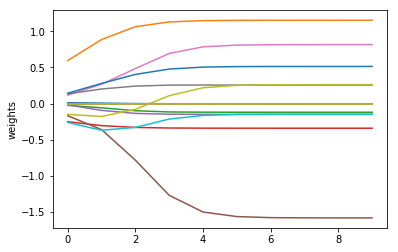

In [410]:
plt.plot(coefs[:, 1:].T)
plt.ylabel('weights')

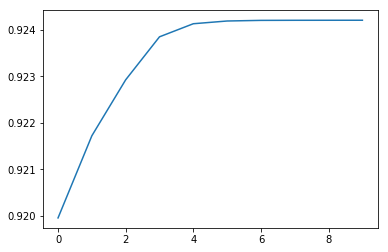

In [411]:
plt.plot(scores)

In [18]:
coef = [0.01374595, 1.16294011, -0.1161365, -0.35273088, -0.12557769, -1.784048, 0.68810352, 
        0.15630591, 0.97300666, -0.45134132, 0.53299833, -0.02370297, -0.0186811, -0.00525726, 
        -0.06726129, -0.05357052, -0.27559097, 0.00228308, 0.01420319]
lr = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(C=3.0, random_state=123,
                           fit_intercept=True,
                           penalty='l2'))])
lr.fit(X_train, y_train)

lr2 = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(C=3.0, random_state=123,
                           fit_intercept=True, 
                           penalty='l2'))])
lr2.fit(X_train2, y_train2)

lr3 = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(C=3.0, random_state=123,
                           fit_intercept=True, 
                           penalty='l2'))])
lr3.fit(X_train3, y_train3)

lr4 = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(C=3.0, random_state=123,
                           fit_intercept=True, 
                           penalty='l2'))])
lr4.fit(X_train4, y_train4)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=3.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [14]:
y_hat1 = tree.predict(X_train)
y_hat2 = tree2.predict(X_train2)
y_hat3 = tree3.predict(X_train3)
y_hat4 = tree4.predict(X_train4)

res = pd.DataFrame(df_train_exist['_id'])
res['Target_hat1'] = pd.Series(y_hat1)
res['Target_hat2'] = pd.Series(y_hat2)
res['Target_hat3'] = pd.Series(y_hat3)
res['Target_hat4'] = pd.Series(y_hat4)
res['Target'] = pd.Series(y_train)
print(res['Target'].value_counts())
print(res['Target_hat1'].value_counts())
print(res['Target_hat2'].value_counts())
print(res['Target_hat3'].value_counts())
print(res['Target_hat4'].value_counts())

test = res[res['Target'] != res['Target_hat4']]

0    21925
1     2787
Name: Target, dtype: int64
0    22320
1     2392
Name: Target_hat1, dtype: int64
0    22336
1     2376
Name: Target_hat2, dtype: int64
0    22350
1     2362
Name: Target_hat3, dtype: int64
0    22679
1     2033
Name: Target_hat4, dtype: int64


In [15]:
print(test['Target'].value_counts())
print(test['Target_hat1'].value_counts())
print(test['Target_hat2'].value_counts())
print(test['Target_hat3'].value_counts())
print(test['Target_hat4'].value_counts())
print(pd.Series(y_train2).value_counts())


1    1435
0     681
Name: Target, dtype: int64
0    1204
1     912
Name: Target_hat1, dtype: int64
0    1210
1     906
Name: Target_hat2, dtype: int64
0    1219
1     897
Name: Target_hat3, dtype: int64
0    1435
1     681
Name: Target_hat4, dtype: int64
0    21925
1     2787
dtype: int64


In [16]:
# Fit the decision tree classifier
tree3.fit(X_train3, y_train3)

fi = tree3.feature_importances_
features = df_train3.columns.tolist()
l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0017339398506835677
duration............ 0.49994941264661585
campaign............ 0.001288157565663565
pdays............... 0.0389771412586064
previous............ 0.0
emp.var.rate........ 0.0
cons.price.idx...... 0.007245065236319201
cons.conf.idx....... 0.031796418853373455
euribor3m........... 0.051599514294110214
nr.employed......... 0.36172492330432704
target.............. 0.003334296997960743
contact_enc......... 0.0
default_enc......... 0.0
housing_enc......... 0.0
loan_enc............ 0.0
job_enc............. 0.0
marital_enc......... 0.0
month_enc........... 0.0023511299923400755
day_of_week_enc..... 0.0


IndexError: index 19 is out of bounds for axis 0 with size 19

In [19]:
scores_knn = cross_val_score(
    knn,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)
print('КНН')
print(scores_knn)
print(scores_knn.mean())

scores_knn2 = cross_val_score(
    knn2,
    X_train2,
    y_train2,
    scoring='roc_auc',
    cv=10
)
print('КНН 2')
print(scores_knn2)
print(scores_knn2.mean())

scores_knn3 = cross_val_score(
    knn3,
    X_train3,
    y_train3,
    scoring='roc_auc',
    cv=10
)
print('КНН 3')
print(scores_knn3)
print(scores_knn3.mean())

scores_knn4 = cross_val_score(
    knn4,
    X_train4,
    y_train4,
    scoring='roc_auc',
    cv=10
)
print('КНН 4')
print(scores_knn4)
print(scores_knn4.mean())

print('Дерево')
scores_tree = cross_val_score(
    tree,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)
print(scores_tree)
print(scores_tree.mean())

scores_tree2 = cross_val_score(
    tree2,
    X_train2,
    y_train2,
    scoring='roc_auc',
    cv=10
)
print('Дерево 2')
print(scores_tree2)
print(scores_tree2.mean())

scores_tree3 = cross_val_score(
    tree3,
    X_train3,
    y_train3,
    scoring='roc_auc',
    cv=10
)
print('Дерево 3')
print(scores_tree3)
print(scores_tree3.mean())

scores_tree4 = cross_val_score(
    tree4,
    X_train4,
    y_train4,
    scoring='roc_auc',
    cv=10
)
print('Дерево 4')
print(scores_tree4)
print(scores_tree4.mean())

scores_lr = cross_val_score(
    lr,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)
print('Лог регрессия')
print(scores_lr)
print(scores_lr.mean())

scores_lr2 = cross_val_score(
    lr2,
    X_train2,
    y_train2,
    scoring='roc_auc',
    cv=10
)
print('Лог регрессия 2')
print(scores_lr2)
print(scores_lr2.mean())

scores_lr3 = cross_val_score(
    lr3,
    X_train3,
    y_train3,
    scoring='roc_auc',
    cv=10
)
print('Лог регрессия 3')
print(scores_lr3)
print(scores_lr3.mean())

scores_lr4 = cross_val_score(
    lr4,
    X_train4,
    y_train4,
    scoring='roc_auc',
    cv=10
)
print('Лог регрессия 4')
print(scores_lr4)
print(scores_lr4.mean())

КНН
[0.90331767 0.91813181 0.91513012 0.92530364 0.92226616 0.90631611
 0.94001658 0.92657985 0.90489064 0.92056984]
0.9182522428705283
КНН 2
[0.91037011 0.90396854 0.91786941 0.90985022 0.91181549 0.91028555
 0.92289168 0.91827068 0.90730045 0.90994818]
0.9122570291838012
КНН 3
[0.90064678 0.90457    0.91237587 0.90849962 0.91651564 0.90374472
 0.92218538 0.91857218 0.90365652 0.90992439]
0.9100691115410658
КНН 4
[0.92884443 0.93193327 0.93415691 0.93139972 0.93171669 0.93519366
 0.9365953  0.93392057 0.91948379 0.93411016]
0.931735450332759
Дерево
[0.92609835 0.92077023 0.91709284 0.92520516 0.92481944 0.91096983
 0.93433355 0.92452853 0.90589964 0.92328956]
0.9213007134420035
Дерево 2
[0.92516838 0.92143542 0.91670794 0.9283195  0.92482353 0.91079651
 0.93477258 0.92455151 0.90523503 0.92300074]
0.9214811139288119
Дерево 3
[0.92563582 0.92143542 0.91665318 0.92875997 0.92490525 0.91079651
 0.93477258 0.92359151 0.90547544 0.92244279]
0.9214468477164488
Дерево 4
[0.92571754 0.9132667

In [287]:
def regression_report(X_s, y_s, model, labels, score=mean_absolute_error):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
    ax = ax.flatten()

    colors = plt.cm.jet(np.linspace(0, 1, len(labels)))

    for idx, label in enumerate(labels):
        X = X_s[idx]
        y_true = y_s[idx]

        y_hat = model.predict(X)

        # Scatter
        ax[0].scatter(y_hat, y_true, color = colors[idx], alpha=0.3,
                      label='%s Score - %2.4f' % (label, score(y_true, y_hat)))

        # Resid
        resid = y_true - y_hat
        ax[1].scatter(resid, y_true, color = colors[idx], alpha=0.3, label=label)

        # Distr
        ax[2].hist(y_hat, alpha=0.5, label=label, color = colors[idx], normed=True)

        # Resid
        resid = y_true - y_hat
        ax[3].scatter(resid, y_hat, color = colors[idx], alpha=0.3, label=label)

    ax[0].legend(loc=4)
    ax[0].set_xlabel('$\hat{y}$')
    ax[0].set_ylabel('$y$')

    ax[1].legend(loc=2)
    ax[1].set_xlabel('$resid$')
    ax[1].set_ylabel('$y$')

    ax[2].legend(loc=2)
    ax[2].set_xlabel('$\hat{y}$')

    ax[3].legend(loc=2)
    ax[3].set_xlabel('$resid$')
    ax[3].set_ylabel('$\hat{y}$')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_hat = tree4.predict(X_test4)
y_test4 = pd.Series(y_hat)

regression_report([X_train4, X_test4], [y_train4, y_test4], knn4,
                  ['train', 'test'], score=mean_absolute_error)

In [25]:
#сразу делаем на тестовой
df = df_test.pipe(preproc_data4)

y_hat = knn4.predict(df)
y_hat

X_test = df.values
##y_test = pd.Series(y_hat).round(decimals=0).astype(int)
y_test = pd.Series(y_hat)


In [23]:
knn4.predict(df)

AttributeError: 'KNeighborsRegressor' object has no attribute 'predict_proba'

In [28]:
res = pd.DataFrame(df_test['_id'])
##res['Target'] = pd.Series(y_hat).round(decimals=0).astype(int)
res['Target'] = pd.Series(y_hat)
res['Target'].value_counts()
res

,_id,Target
0,66810d8e6bf2b41c880a7bc6c8a1e295,0.095238
1,ccac3879652b08cb8b44c1920fd93afa,0.000000
2,fcccab4d7a76f70647f015f2c84c2af8,0.000000
3,ed8399278c30678dab739045fa12b440,0.000000
4,1d4d62ac5cabcb48bac7112813f290cb,0.000000
5,aba2dec4c5cab88824f36babd24b986f,0.142857
6,06f318f1dd178e738f675bb88a5adb84,0.000000
7,d5036f5956e42ee6207296238fc4bc1d,0.000000
8,fe0cc8933698ad4046ff2b82f65756eb,0.000000
9,70190122f4ebf196535e11b33eb95b81,0.000000


In [27]:
res.to_csv('submission_6_late.csv', sep = ',', index=False)
#submission_5 - кнн4
#submission_4 - дерево2